# Evolution of Min and Max IDPs over time

## Dataset prepared:

- location is /Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/01.IMPACT_Data/movement_monitoring/02.exploration.displacement.002.REACH_data_towns_in_impact.csv

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import re
%matplotlib inline

In [10]:
fname = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/01.IMPACT_Data/movement_monitoring/02.exploration.displacement.002.REACH_data_towns_in_impact.csv'
data = pd.read_csv(fname, index_col=0)
data

gov_code distr_code  sbd_code q_town pre_conf_pop_remained  min_IDPs  \
0        SY02     SY0200  SY020001  C1022               76-100%   24500.0   
1        SY02     SY0200  SY020001  C1022                51-75%   23000.0   
2        SY02     SY0200  SY020001  C1022               76-100%   23000.0   
3        SY02     SY0200  SY020001  C1022                51-75%   23000.0   
4        SY02     SY0200  SY020001  C1022                51-75%   23000.0   
...       ...        ...       ...    ...                   ...       ...   
1791     SY11     SY1102  SY110202  C5905               76-100%    2500.0   
1792     SY08     SY0803  SY080302  C4969               76-100%     200.0   
1793     SY08     SY0803  SY080302  C4969               76-100%    1200.0   
1794     SY09     SY0901  SY090100  N0419               76-100%    1850.0   
1795     SY09     SY0901  SY090100  N0419               76-100%    1900.0   

      max_IDPs          month        lat       long town_location_code  \
0      25000.0     august2018  36.137884  36.828382              C1022   
1      23200.0   november2018  36.137884  36.828382              C1022   
2      23500.0  september2018  36.137884  36.828382              C1022   
3      23500.0   december2018  36.137884  36.828382              C1022   
4      23200.0    october2018  36.137884  36.828382              C1022   
...        ...            ...        ...        ...                ...   
1791    2800.0        may2019  36.383689  38.862789              C5905   
1792     220.0     august2019  36.812009  42.065712              C4969   
1793    1500.0        may2019  36.812009  42.065712              C4969   
1794    1900.0      april2019  35.336861  40.125720              N0419   
1795    2000.0        may2019  35.336861  40.125720              N0419   

             ms  
0     60.000000  
1     60.000000  
2     60.000000  
3     60.000000  
4     60.000000  
...         ...  
1791   4.615385  
1792   4.615385  
1793   4.615385  
1794   4.615385  
1795   4.615385  

[1796 rows x 12 columns]

Encode the months to integer values

In [11]:
months = data['month'].unique()
# just make own dictionary, it is quicker
d_months = {
    'april2018': 1,
    'may2018': 2,
    'august2018': 5,
    'september2018': 6,
    'october2018': 7,
    'november2018': 8,
    'december2018': 9,
    'january2019': 10,
    'february2019': 11,
    'march2019': 12,
    'april2019': 13,
    'may2019': 14,
    'august2019': 17,

}
data['month_idx'] = data['month'].map(d_months)
# add missing months
# data = data.append(pd.Series([np.nan,np.nan, -1,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,3], index=data.columns),ignore_index=True)
data = data.append(pd.Series([-1,3], index=['sbd_code','month_idx']),ignore_index=True)
data = data.append(pd.Series([-1,4], index=['sbd_code','month_idx']),ignore_index=True)

data = data.append(pd.Series([-1,13], index=['sbd_code','month_idx']),ignore_index=True)
data = data.append(pd.Series([-1,14], index=['sbd_code','month_idx']),ignore_index=True)
data['month_idx'] = data['month_idx'].astype(np.int64)
data

gov_code distr_code  sbd_code q_town pre_conf_pop_remained  min_IDPs  \
0        SY02     SY0200  SY020001  C1022               76-100%   24500.0   
1        SY02     SY0200  SY020001  C1022                51-75%   23000.0   
2        SY02     SY0200  SY020001  C1022               76-100%   23000.0   
3        SY02     SY0200  SY020001  C1022                51-75%   23000.0   
4        SY02     SY0200  SY020001  C1022                51-75%   23000.0   
...       ...        ...       ...    ...                   ...       ...   
1795     SY09     SY0901  SY090100  N0419               76-100%    1900.0   
1796      NaN        NaN        -1    NaN                   NaN       NaN   
1797      NaN        NaN        -1    NaN                   NaN       NaN   
1798      NaN        NaN        -1    NaN                   NaN       NaN   
1799      NaN        NaN        -1    NaN                   NaN       NaN   

      max_IDPs          month        lat       long town_location_code  \
0      25000.0     august2018  36.137884  36.828382              C1022   
1      23200.0   november2018  36.137884  36.828382              C1022   
2      23500.0  september2018  36.137884  36.828382              C1022   
3      23500.0   december2018  36.137884  36.828382              C1022   
4      23200.0    october2018  36.137884  36.828382              C1022   
...        ...            ...        ...        ...                ...   
1795    2000.0        may2019  35.336861  40.125720              N0419   
1796       NaN            NaN        NaN        NaN                NaN   
1797       NaN            NaN        NaN        NaN                NaN   
1798       NaN            NaN        NaN        NaN                NaN   
1799       NaN            NaN        NaN        NaN                NaN   

             ms  month_idx  
0     60.000000          5  
1     60.000000          8  
2     60.000000          6  
3     60.000000          9  
4     60.000000          7  
...         ...        ...  
1795   4.615385         14  
1796        NaN          3  
1797        NaN          4  
1798        NaN         13  
1799        NaN         14  

[1800 rows x 13 columns]

In [12]:
# get min and max for the pre_conf_pop_remained
def get_min_max_pre_conf_pop_remained(row):
    row = str(row)
    # minimum value
    min_pre_conf_pop_remained = 0
    _ = re.findall(r'(\d*)-', row)
    if len(_) > 0:
        min_pre_conf_pop_remained = _[0]

    # maximum value
    max_pre_conf_pop_remained = 0
    _ = re.findall(r'-(\d*)', row)
    if len(_) > 0:
        max_pre_conf_pop_remained = _[0]
    
    return pd.Series([min_pre_conf_pop_remained, max_pre_conf_pop_remained], index=['min_pre_conf_pop_remained', 'max_pre_conf_pop_remained'])

a = data['pre_conf_pop_remained'].apply(lambda x: get_min_max_pre_conf_pop_remained(x))
data = data.merge(a, how='left', left_index=True, right_index=True)
data

gov_code distr_code  sbd_code q_town pre_conf_pop_remained  min_IDPs  \
0        SY02     SY0200  SY020001  C1022               76-100%   24500.0   
1        SY02     SY0200  SY020001  C1022                51-75%   23000.0   
2        SY02     SY0200  SY020001  C1022               76-100%   23000.0   
3        SY02     SY0200  SY020001  C1022                51-75%   23000.0   
4        SY02     SY0200  SY020001  C1022                51-75%   23000.0   
...       ...        ...       ...    ...                   ...       ...   
1795     SY09     SY0901  SY090100  N0419               76-100%    1900.0   
1796      NaN        NaN        -1    NaN                   NaN       NaN   
1797      NaN        NaN        -1    NaN                   NaN       NaN   
1798      NaN        NaN        -1    NaN                   NaN       NaN   
1799      NaN        NaN        -1    NaN                   NaN       NaN   

      max_IDPs          month        lat       long town_location_code  \
0      25000.0     august2018  36.137884  36.828382              C1022   
1      23200.0   november2018  36.137884  36.828382              C1022   
2      23500.0  september2018  36.137884  36.828382              C1022   
3      23500.0   december2018  36.137884  36.828382              C1022   
4      23200.0    october2018  36.137884  36.828382              C1022   
...        ...            ...        ...        ...                ...   
1795    2000.0        may2019  35.336861  40.125720              N0419   
1796       NaN            NaN        NaN        NaN                NaN   
1797       NaN            NaN        NaN        NaN                NaN   
1798       NaN            NaN        NaN        NaN                NaN   
1799       NaN            NaN        NaN        NaN                NaN   

             ms  month_idx min_pre_conf_pop_remained max_pre_conf_pop_remained  
0     60.000000          5                        76                       100  
1     60.000000          8                        51                        75  
2     60.000000          6                        76                       100  
3     60.000000          9                        51                        75  
4     60.000000          7                        51                        75  
...         ...        ...                       ...                       ...  
1795   4.615385         14                        76                       100  
1796        NaN          3                         0                         0  
1797        NaN          4                         0                         0  
1798        NaN         13                         0                         0  
1799        NaN         14                         0                         0  

[1800 rows x 15 columns]

Export

In [13]:
fname = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/01.IMPACT_Data/movement_monitoring/02.exploration.displacement.002.REACH_data_towns_in_impact_month_idx.csv'
data.to_csv(fname)

Aggregate by subdistrict

In [43]:
data_agg = data[['month_idx','sbd_code','min_IDPs','max_IDPs']].groupby(['month_idx','sbd_code']).sum().reset_index()
data_agg['min_IDPs_per_1k'] = data_agg['min_IDPs'] / 1000.0
data_agg['max_IDPs_per_1k'] = data_agg['max_IDPs'] / 1000.0
data_agg

month_idx  sbd_code  min_IDPs  max_IDPs  min_IDPs_per_1k  max_IDPs_per_1k
0            1  SY020001   77100.0   79300.0           77.100           79.300
1            1  SY020003    2575.0    2710.0            2.575            2.710
2            1  SY020004   12200.0   12740.0           12.200           12.740
3            1  SY020005    9000.0    9900.0            9.000            9.900
4            1  SY020203   15000.0   15900.0           15.000           15.900
..         ...       ...       ...       ...              ...              ...
869         15  SY110201    1800.0    1920.0            1.800            1.920
870         15  SY110202    2487.0    2815.0            2.487            2.815
871         15  SY110300   50000.0   60000.0           50.000           60.000
872         15  SY110301    5000.0    5050.0            5.000            5.050
873         15  SY110302     250.0     350.0            0.250            0.350

[874 rows x 6 columns]

Export


In [44]:
fname = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/01.IMPACT_Data/movement_monitoring/02.exploration.displacement.002.REACH_data_towns_in_impact_month_idx.agg_sum.csv'
data_agg.to_csv(fname)

Boxplot limited, sum aggregated by **subdistrict**

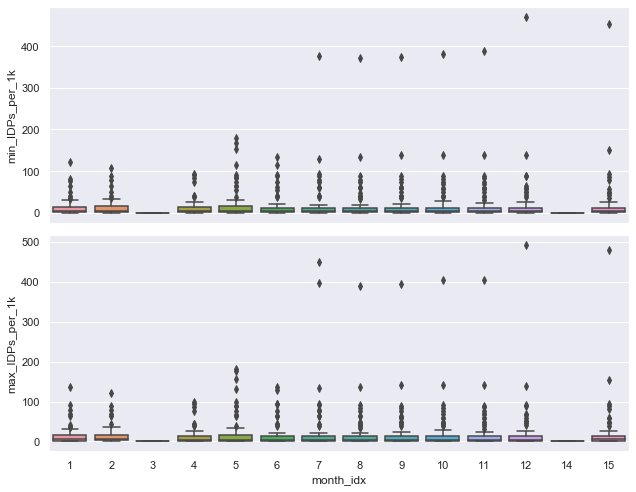

In [28]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(9,7),sharex=True)
sns.set()
sns.boxplot(x="month_idx", y="min_IDPs_per_1k", data=data_agg, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('min_IDPs_per_1k')

sns.boxplot(x="month_idx", y="max_IDPs_per_1k", data=data_agg, ax=ax2)
ax2.set_ylabel('max_IDPs_per_1k')

plt.tight_layout()
plt.show()

Boxplot limited, sum aggregated by **subdistrict**

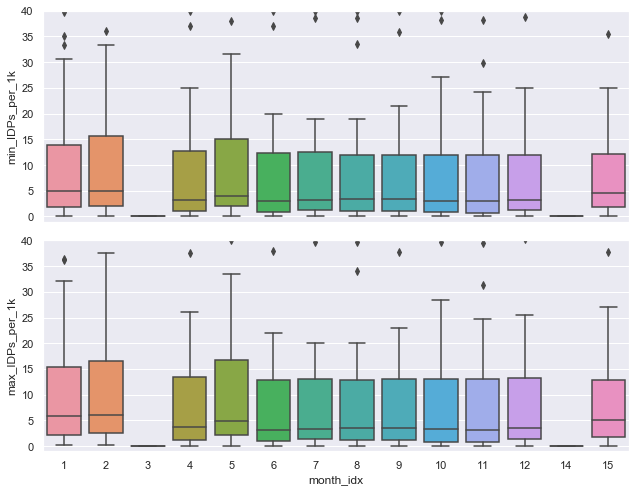

In [29]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(9,7),sharex=True)
sns.set()
sns.boxplot(x="month_idx", y="min_IDPs_per_1k", data=data_agg, ax=ax1)
ax1.set_ylim([-1,4e1])
ax1.set_ylabel('min_IDPs_per_1k')
ax1.set_xlabel('')

sns.boxplot(x="month_idx", y="max_IDPs_per_1k", data=data_agg, ax=ax2)
ax2.set_ylabel('max_IDPs_per_1k')

# sns.boxplot(x=data_agg.loc[2,'min_IDPs'], ax=ax, orient='v')
ax2.set_ylim([-1,4e1])
plt.tight_layout()
plt.show()

Check the extreme values

In [30]:
limit = 200 # in k
data_agg_high_IDP = data_agg[data_agg['min_IDPs_per_1k']>200]
data_agg[data_agg['sbd_code']=='SY070301']

month_idx  sbd_code  min_IDPs  max_IDPs  min_IDPs_per_1k  max_IDPs_per_1k
25           1  SY070301  121500.0  135500.0          121.500          135.500
94           2  SY070301  106500.0  120250.0          106.500          120.250
164          4  SY070301   11000.0   13000.0           11.000           13.000
231          5  SY070301  115080.0  130300.0          115.080          130.300
304          6  SY070301  115650.0  129600.0          115.650          129.600
378          7  SY070301  376000.0  396900.0          376.000          396.900
457          8  SY070301  370900.0  387880.0          370.900          387.880
536          9  SY070301  373800.0  393660.0          373.800          393.660
614         10  SY070301  382225.0  403294.0          382.225          403.294
692         11  SY070301  388255.0  403218.0          388.255          403.218
767         12  SY070301  471415.0  490974.0          471.415          490.974
839         15  SY070301  453815.0  478054.0          453.815          478.054

Where are these subdistricts

In [31]:
data_high_IDP = data[data['sbd_code'].isin(data_agg_high_IDP['sbd_code'])]
data_high_IDP

gov_code distr_code  sbd_code q_town pre_conf_pop_remained  min_IDPs  \
710     SY07     SY0703  SY070301  C4121               76-100%   15000.0   
711     SY07     SY0703  SY070301  C4121               76-100%   15000.0   
712     SY07     SY0703  SY070301  C4121               76-100%   19000.0   
713     SY07     SY0703  SY070301  C4121               76-100%   19000.0   
714     SY07     SY0703  SY070301  C4121               76-100%   19000.0   
..       ...        ...       ...    ...                   ...       ...   
797     SY07     SY0703  SY070301  C4132               76-100%   20000.0   
798     SY07     SY0703  SY070301  C4132               76-100%   19000.0   
799     SY07     SY0703  SY070301  C4132               76-100%   18500.0   
800     SY07     SY0703  SY070301  C4132               76-100%    7500.0   
801     SY07     SY0703  SY070301  C4132               76-100%   19000.0   

     max_IDPs         month        lat       long town_location_code  \
710   17000.0    august2018  36.186604  36.723929              C4121   
711   18000.0  november2018  36.186604  36.723929              C4121   
712   20000.0  december2018  36.186604  36.723929              C4121   
713   20000.0   january2019  36.186604  36.723929              C4121   
714   20000.0     march2019  36.186604  36.723929              C4121   
..        ...           ...        ...        ...                ...   
797   21000.0    august2019  36.174632  36.666375              C4132   
798   20000.0  february2019  36.174632  36.666375              C4132   
799   19000.0     april2019  36.174632  36.666375              C4132   
800    8500.0       may2018  36.174632  36.666375              C4132   
801   20000.0       may2019  36.174632  36.666375              C4132   

            ms  month_idx  
710  50.769231          5  
711  50.769231          6  
712  50.769231          7  
713  50.769231          8  
714  50.769231         10  
..         ...        ...  
797  50.769231         15  
798  50.769231          9  
799  50.769231         11  
800  50.769231          2  
801  50.769231         12  

[92 rows x 13 columns]

Plot them

 
Darkred o: locations in REACH dataset which have IDPs > 200000


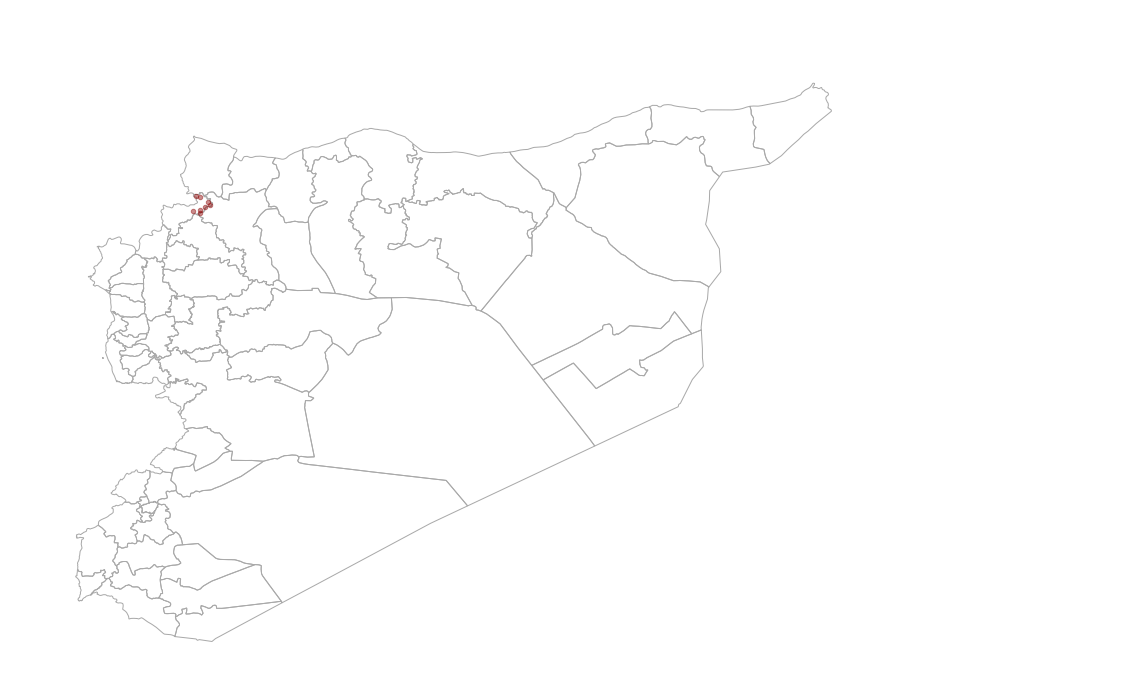

In [32]:
# remove duplicates
towns_high_IDP = data_high_IDP.drop_duplicates(subset='q_town', keep='first')

## Plot
import geopandas
import geoplot
# points for impact data
from shapely.geometry import Point # Shapely for converting
# creating a geometry column 
geometry = [Point(xy) for xy in zip(towns_high_IDP['long'], towns_high_IDP['lat'])]
# Coordinate reference system 
crs = {'init': 'epsg:4326'}
# Creating a Geographic data frame 
gdf = geopandas.GeoDataFrame(towns_high_IDP, crs=crs, geometry=geometry)

shapefile = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/03.geolocation_syria/syr_admin_shp_utf8_19321/syr_admin2.shp'
syria = geopandas.read_file(shapefile)
# syria = geopandas.read_file('/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/03.geolocation_syria/syr_admin_shp_utf8_19321/syr_pplp_adm4_unocha.shp')


geoplot.polyplot(syria, edgecolor='darkgray', figsize=(20, 20))
ax = plt.gca()
# print(ax.get_ylim())
ax.set_xlim([35,45])
ax.set_ylim([32,38])
# print(ax.get_ylim())
gdf.plot(ax=ax, marker='o', markersize=20, color='darkred', alpha=0.45)

print(' ')

print(f'Darkred o: locations in REACH dataset which have IDPs > 200000')
plt.savefig('/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/01.IMPACT_Data/movement_monitoring/plot_reach_towns_high_IDPs.pdf')
plt.show()

# Look at change in displacement total number in one subdistrict

In [11]:
def agg_change(df):
    """
    Returns a dataframe with the change in min and max IDPs for this subdistrict.
    """
    next_month

In [12]:
data_agg['min_IDPs_per_1k']

0      77.100
1       2.575
2      12.200
3       9.000
4      15.000
        ...  
910     1.800
911     2.487
912    50.000
913     5.000
914     0.250
Name: min_IDPs_per_1k, Length: 915, dtype: float64

In [13]:
data_agg = data_agg.sort_values(by=['month_idx'])
data_agg[data_agg['sbd_code']=='SY020005']

month_idx  sbd_code  min_IDPs  max_IDPs  min_IDPs_per_1k  max_IDPs_per_1k
3            1  SY020005    9000.0    9900.0             9.00              9.9
74           2  SY020005    9400.0   10400.0             9.40             10.4
143          4  SY020005    6100.0    6900.0             6.10              6.9
203          5  SY020005    2700.0    3000.0             2.70              3.0
386          8  SY020005    5000.0    6000.0             5.00              6.0
464          9  SY020005    5200.0    6300.0             5.20              6.3
543         10  SY020005    5200.0    6500.0             5.20              6.5
621         11  SY020005    5200.0    6500.0             5.20              6.5
699         12  SY020005    5750.0    7000.0             5.75              7.0
776         13  SY020005    5600.0    6600.0             5.60              6.6
853         16  SY020005    4300.0    5200.0             4.30              5.2